In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from xgboost import XGBClassifier

In [4]:
import pandas as pd
df = pd.read_excel('//content/balanced_all_data_TargetOnly_ADASYN.xlsx')
df.shape

(2941, 17)

In [5]:
df.STATUS_dead_alive.value_counts()

1    1476
0    1465
Name: STATUS_dead_alive, dtype: int64

In [6]:

# Assuming df is your DataFrame and it's ready for use
X = df.drop('STATUS_dead_alive', axis=1)  # Features
y = df['STATUS_dead_alive']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
import numpy as np
import pandas as pd

# Assuming you already have the test set and the label "STATUS_dead_alive" in y_test
# You can obtain the unique classes and their counts as follows:

# Find unique classes in the test set
unique_classes = np.unique(y_test)

# Count the number of samples for each unique class
class_counts = pd.Series(y_test).value_counts()

# Print the unique classes and their counts
print("Unique Classes in Test Set:", unique_classes)
print("Class Distribution in Test Set:")
print(class_counts)

Unique Classes in Test Set: [0 1]
Class Distribution in Test Set:
1    296
0    293
Name: STATUS_dead_alive, dtype: int64


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have loaded your DataFrame into df

# Separate features and target
X = df.drop(columns=['STATUS_dead_alive'])  # Features
y = df['STATUS_dead_alive']  # Target

# Convert the features to binary integers if they are not already
X = X.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the desired class distribution for the test set
desired_class_distribution = {0: 0.7, 1: 0.3}

# Adjust the class distribution in the test set manually
class1_indices = y_test[y_test == 1].sample(frac=desired_class_distribution[1]).index
class0_indices = y_test[y_test == 0].sample(frac=desired_class_distribution[0]).index

# Combine the selected samples into the final test set
balanced_df_test = pd.concat([X_test.loc[class1_indices], X_test.loc[class0_indices]])
y_test_balanced = pd.concat([y_test.loc[class1_indices], y_test.loc[class0_indices]])

# Combine the features and target into a DataFrame for testing
balanced_df_test = pd.concat([balanced_df_test, y_test_balanced], axis=1)

# Save the balanced test set to an Excel file
balanced_df_test.to_excel('balanced_test_data.xlsx', index=False)

In [9]:
X_test = balanced_df_test.drop(columns=['STATUS_dead_alive'])
y_test = balanced_df_test['STATUS_dead_alive']

In [10]:
import numpy as np
import pandas as pd

# Assuming you already have the test set and the label "STATUS_dead_alive" in y_test
# You can obtain the unique classes and their counts as follows:

# Find unique classes in the test set
unique_classes = np.unique(y_test)

# Count the number of samples for each unique class
class_counts = pd.Series(y_test).value_counts()

# Print the unique classes and their counts
print("Unique Classes in Test Set:", unique_classes)
print("Class Distribution in Test Set:")
print(class_counts)

Unique Classes in Test Set: [0 1]
Class Distribution in Test Set:
0    204
1     89
Name: STATUS_dead_alive, dtype: int64


In [36]:
from tpot import TPOTClassifier
from sklearn.metrics import f1_score
import joblib

# Instantiate TPOTClassifier
tpot = TPOTClassifier(generations=50, population_size=20, verbosity=2, random_state=42,
                      early_stop=8, scoring='f1', config_dict="TPOT sparse")

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Score the optimized pipeline on the test set
test_score = tpot.score(X_test, y_test)
print(f"F1 Score on Test Set: {test_score}")

# Score the optimized pipeline on the train set
train_score = tpot.score(X_train, y_train)
print(f"F1 Score on Train Set: {train_score}")

# Print the best pipeline
print("Best pipeline steps:", end="\n")
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f"{idx}. {name}")

# Save the best pipeline to a Python file
tpot.export('tpot_best_pipeline.py')

# Save the trained model
joblib.dump(tpot.fitted_pipeline_, 'tpot_trained_model.pkl')


Optimization Progress:   0%|          | 0/1020 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9379270886717039

Generation 2 - Current best internal CV score: 0.9400495036406724

Generation 3 - Current best internal CV score: 0.9400495036406724

Generation 4 - Current best internal CV score: 0.9415707773322103

Generation 5 - Current best internal CV score: 0.9440140283149739

Generation 6 - Current best internal CV score: 0.9444234070986932

Generation 7 - Current best internal CV score: 0.9464468741865971

Generation 8 - Current best internal CV score: 0.9464468741865971

Generation 9 - Current best internal CV score: 0.9464468741865971

Generation 10 - Current best internal CV score: 0.9464468741865971

Generation 11 - Current best internal CV score: 0.9464468741865971

Generation 12 - Current best internal CV score: 0.9464468741865971

Generation 13 - Current best internal CV score: 0.9468568068930864

Generation 14 - Current best internal CV score: 0.9468568068930864

Generation 15 - Current best internal CV score: 0.946856

['tpot_trained_model.pkl']

In [ ]:
tpot.export('optimized_pipeline.py')
from joblib import dump

In [38]:
from joblib import dump

# Save the trained TPOT model
dump(tpot.fitted_pipeline_, 'tpot_trained_model.joblib')


['tpot_trained_model.joblib']

In [39]:
from joblib import load
# Load the saved TPOT model
tpot_model = load('tpot_trained_model.joblib')


tpot.fitted_pipeline_


Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        max_features=0.55, min_samples_split=15,
                                        random_state=42))])

In [40]:

tpot.score(X_test, y_test)



0.9032258064516129

In [41]:
tpot.score(X_train, y_train)

0.9558638083228246

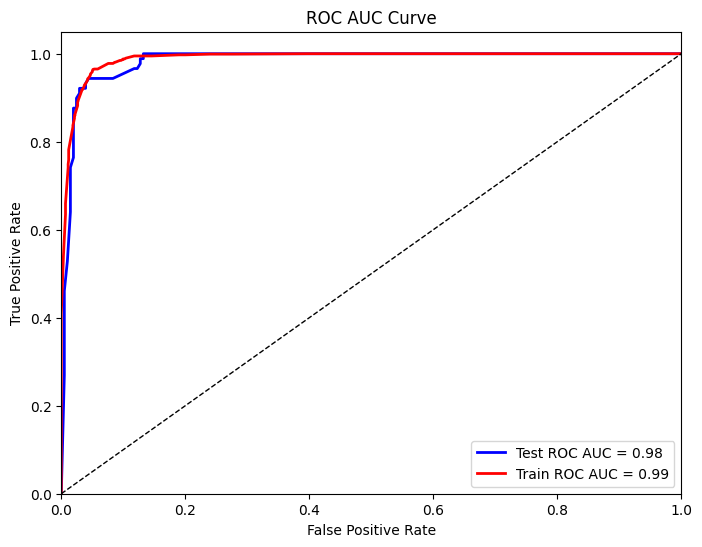

In [42]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Load the trained model
tpot_trained_model = joblib.load('tpot_trained_model.pkl')

# Predict probabilities on the test and train sets
y_test_probs = tpot_trained_model.predict_proba(X_test)[:, 1]
y_train_probs = tpot_trained_model.predict_proba(X_train)[:, 1]

# Calculate ROC AUC score for test set
test_roc_auc = roc_auc_score(y_test, y_test_probs)

# Calculate ROC AUC score for train set
train_roc_auc = roc_auc_score(y_train, y_train_probs)

# Compute ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)

# Compute ROC curve for train set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC AUC = {test_roc_auc:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'Train ROC AUC = {train_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [43]:
import joblib
from sklearn.metrics import confusion_matrix

# Load the trained model
tpot_trained_model = joblib.load('tpot_trained_model.pkl')

# Predict labels on the test and train sets
y_test_pred = tpot_trained_model.predict(X_test)
y_train_pred = tpot_trained_model.predict(X_train)

# Compute confusion matrix for test set
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Compute confusion matrix for train set
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()

# Print the results
print("Test Set:")
print(f"True Positives: {tp_test}")
print(f"True Negatives: {tn_test}")
print(f"False Positives: {fp_test}")
print(f"False Negatives: {fn_test}")
print()
print("Train Set:")
print(f"True Positives: {tp_train}")
print(f"True Negatives: {tn_train}")
print(f"False Positives: {fp_train}")
print(f"False Negatives: {fn_train}")


Test Set:
True Positives: 84
True Negatives: 191
False Positives: 13
False Negatives: 5

Train Set:
True Positives: 1137
True Negatives: 1110
False Positives: 64
False Negatives: 41


In [44]:
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix

# Load the trained model
tpot_trained_model = joblib.load('tpot_trained_model.pkl')

# Predict probabilities on the test set
y_test_probs = tpot_trained_model.predict_proba(X_test)[:, 1]

# Adjust the threshold to reduce false negatives
threshold = 0.5  # Example threshold, you can adjust it as needed
y_test_pred = np.where(y_test_probs > threshold, 1, 0)

# Compute confusion matrix for test set
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Print the results
print("Test Set:")
print(f"True Positives: {tp_test}")
print(f"True Negatives: {tn_test}")
print(f"False Positives: {fp_test}")
print(f"False Negatives: {fn_test}")


Test Set:
True Positives: 84
True Negatives: 191
False Positives: 13
False Negatives: 5


In [45]:
# Load the trained model
tpot_trained_model = joblib.load('tpot_trained_model.pkl')

# Predict probabilities on the test and train sets
y_test_probs = tpot_trained_model.predict_proba(X_test)[:, 1]
y_train_probs = tpot_trained_model.predict_proba(X_train)[:, 1]

# Adjust the prediction threshold
threshold = 0.2  # Example threshold, adjust as needed
y_test_pred_adjusted = (y_test_probs > threshold).astype(int)
y_train_pred_adjusted = (y_train_probs > threshold).astype(int)

# Compute confusion matrix for test set
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred_adjusted).ravel()

# Compute confusion matrix for train set
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred_adjusted).ravel()

# Print the results
print("Adjusted Test Set:")
print(f"True Positives: {tp_test}")
print(f"True Negatives: {tn_test}")
print(f"False Positives: {fp_test}")
print(f"False Negatives: {fn_test}")
print()
print("Adjusted Train Set:")
print(f"True Positives: {tp_train}")
print(f"True Negatives: {tn_train}")
print(f"False Positives: {fp_train}")
print(f"False Negatives: {fn_train}")


Adjusted Test Set:
True Positives: 89
True Negatives: 174
False Positives: 30
False Negatives: 0

Adjusted Train Set:
True Positives: 1172
True Negatives: 1026
False Positives: 148
False Negatives: 6


In [46]:
# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity_test = tp_test / (tp_test + fn_test)
sensitivity_train = tp_train / (tp_train + fn_train)

# Calculate Specificity (True Negative Rate)
specificity_test = tn_test / (tn_test + fp_test)
specificity_train = tn_train / (tn_train + fp_train)

# Calculate Accuracy
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
accuracy_train = (tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)

# Calculate Precision (Positive Predictive Value)
precision_test = tp_test / (tp_test + fp_test)
precision_train = tp_train / (tp_train + fp_train)

# Calculate F1 Score
f1_score_test = 2 * (precision_test * sensitivity_test) / (precision_test + sensitivity_test)
f1_score_train = 2 * (precision_train * sensitivity_train) / (precision_train + sensitivity_train)

# Calculate Positive Predictive Value (Precision) and Negative Predictive Value
ppv_test = precision_test
ppv_train = precision_train
npv_test = tn_test / (tn_test + fn_test)
npv_train = tn_train / (tn_train + fn_train)

# Calculate Positive Likelihood Ratio and Negative Likelihood Ratio
lr_pos_test = sensitivity_test / (1 - specificity_test)
lr_pos_train = sensitivity_train / (1 - specificity_train)
lr_neg_test = (1 - sensitivity_test) / specificity_test
lr_neg_train = (1 - sensitivity_train) / specificity_train

# Print the results
print("Test Set:")
print(f"Sensitivity: {sensitivity_test:.2f}")
print(f"Specificity: {specificity_test:.2f}")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"F1 Score: {f1_score_test:.2f}")
print(f"Positive Predictive Value: {ppv_test:.2f}")
print(f"Negative Predictive Value: {npv_test:.2f}")
print(f"Positive Likelihood Ratio: {lr_pos_test:.2f}")
print(f"Negative Likelihood Ratio: {lr_neg_test:.2f}")
print()

print("Train Set:")
print(f"Sensitivity: {sensitivity_train:.2f}")
print(f"Specificity: {specificity_train:.2f}")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"F1 Score: {f1_score_train:.2f}")
print(f"Positive Predictive Value: {ppv_train:.2f}")
print(f"Negative Predictive Value: {npv_train:.2f}")
print(f"Positive Likelihood Ratio: {lr_pos_train:.2f}")
print(f"Negative Likelihood Ratio: {lr_neg_train:.2f}")


Test Set:
Sensitivity: 1.00
Specificity: 0.85
Accuracy: 0.90
Precision: 0.75
F1 Score: 0.86
Positive Predictive Value: 0.75
Negative Predictive Value: 1.00
Positive Likelihood Ratio: 6.80
Negative Likelihood Ratio: 0.00

Train Set:
Sensitivity: 0.99
Specificity: 0.87
Accuracy: 0.93
Precision: 0.89
F1 Score: 0.94
Positive Predictive Value: 0.89
Negative Predictive Value: 0.99
Positive Likelihood Ratio: 7.89
Negative Likelihood Ratio: 0.01


In [34]:
!pip install tpot